# CHAPTER 5

# Section 1

Learning about how to fit generic mathematical functions in PyTorch, not just for neural networks.


In [1]:
import torch

In [2]:
# trying to calibrate a new thermometer

In [3]:
truth_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # celsius
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # unknown shit

In [4]:
truth_celsius = torch.tensor(truth_celsius)
x = torch.tensor(x)

type(truth_celsius), type(x)

(torch.Tensor, torch.Tensor)

In [5]:
# testing a linear model

# celsius = w * x + b

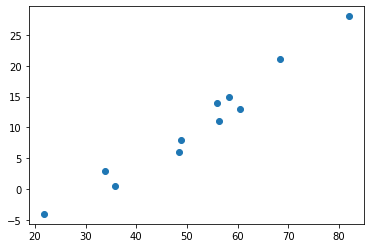

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x, truth_celsius)

In [7]:
# a simple model

def model(data, w, b):
    return data * w + b

In [8]:
# loss function - mean squared difference is used because it is better to have a few slightly
# higher losses than a few really high ones, which mean squared error takes care of

def loss(y, y_pred):
    return torch.mean(torch.pow(y - y_pred, 2))

In [9]:
# initialize params

# we don't need to specify the shape of these params
# because while using multiplication with pytorch tensors, they will be broadcasted
w = torch.ones(())
b = torch.zeros(())

In [10]:
# forward pass

preds = model(x, w, b)
preds

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
loss_val = loss(preds, truth_celsius)
loss_val

tensor(1763.8846)

The hypothesis (forward pass) function is defined as:

$$
\large h(x) = {w \cdot x + b}
$$

To generalize the hypothesis to arbritrary parameters and inputs in a univariate linear regression, we derive:

$$
\large h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1
$$

We will assume the following:

$$
\large b = \theta_0 \\
\large w = \theta_1 \\
$$

Since $b$ or $\theta_0$ is a constant/intercept, it will be multiplied with $1$.

$$
\large x_0 = 1
$$

Hence the loss function will be:

$$
\large \hat{L}_{(y, \hat{y})} = \frac{1}{2m} \sum_{i = 1}^{m}\, (\hat{y}^{(i)} - y^{(i)}) ^ 2 \qquad ,y^{(i)} = h_{\theta}(x^{(i)})
$$

Substituting the hypothesis function into the loss function:

$$
\large \hat{L}_{(\theta_0, \theta_1)} = \frac{1}{2m} \sum_{i = 1}^{m}\, (h_{\theta}(x^{(i)}) - y^{(i)}) ^ 2 \qquad ,h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1
$$

__Note:__ The _2_ in the denominator of the loss function is placed there for convenience so that when the derivative of the loss function is taken, the _2's_ divide out and we are left with $\large\frac{1}{m}$
however this is not implemented in the code because for optimization purposes it is unnecessary.


The $\large\frac{1}{m}$ is in the equation so that the loss function does not depend on the number of examples in the dataset, and its values are comparable across any dataset size.

---

The derivative of the loss function with respect to its parameters according to the Chain rule will be:

$$
\large \frac{\partial}{\partial \theta_{0, 1}}\hat{L}(\theta_0, \theta_1) = 
\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)} \times
\frac{\partial h_{\theta}(x)}{\partial \theta_{0, 1}}
$$

The derivative of the loss function with respect to the hypothesis function is as follows:

$$
\large\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)} = 
\frac{1}{m} \sum_{i = 1}^{m}\, (h_{\theta}(x^{(i)}) - y^{(i)}) \qquad , h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1 
$$

---

The derivative of the hypothesis function with respect to $\theta_0$ will be:

$$
\large\begin{equation}
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0 + \theta_1 x_1) \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0) + \frac{\partial}{\partial \theta_0} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0) + \textit{0} \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = x_0 = 1
\end{equation}
$$

The value of $\large\frac{\partial}{\partial \theta_0} h_{\theta}(x)$ will be broadcasted to a vector so that it is compatible to be multiplied with $\large\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)}$.

---

The derivative of the hypothesis function with respect to $\large\theta_1$ will be:

$$
\large\begin{equation}
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \frac{\partial}{\partial \theta_1} (\theta_0 x_0 + \theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \frac{\partial}{\partial \theta_1} (\theta_0 x_0) + \frac{\partial}{\partial \theta_1} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \textit{0} + \frac{\partial}{\partial \theta_1} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = x_1 \\
x_1 = \vec{x_1}
\end{equation}
$$

$\large\vec{x_1}$ represents the input vector to the model (the list of temperature values in this case).

---

The gradient of the loss function will therefore be:

$$
\Large\nabla_{\theta_0, \theta_1} \hat{L} = 
\begin{pmatrix}
\frac{\partial \hat{L}}{\partial \theta_0}, \frac{\partial \hat{L}}{\partial \theta_1}
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial \hat{L}}{\partial h_{\theta}(x)} \frac{\partial h_{\theta}(x)}{\partial \theta_0},
\frac{\partial \hat{L}}{\partial h_{\theta}(x)} \frac{\partial h_{\theta}(x)}{\partial \theta_1}
\end{pmatrix}
$$

In [12]:
def dl_h(preds, truth):
    derivative = 2 * (preds - truth) / preds.size(0)
    return derivative

In [13]:
dh_w = lambda data, w, b: data

In [14]:
dh_b = lambda data, w, b: 1.0 # this will be broadcasted into a vector when multiplied with dl_dh

In [15]:
# a function to get all the gradients together

def grad(data, preds, truth, w, b):
    l = loss(preds, truth)
    
    dl_dh = dl_h(preds, truth) # this is an intermediate derivative. It's not of much use
    
    # these 2 statements result in vectors
    dl_dw = dl_dh * dh_w(data, w, b)
    dl_db = dl_dh * dh_b(data, w, b)
    
    return torch.stack([dl_dw.sum(), dl_db.sum()]) # sum is done to make the vectors into a scalar

### Training

In [16]:
def train_loop(epochs, lr, params, data, truth):
    for epoch in range(1, epochs+1):
        
        w, b = params
        
        curr_pred = model(data, w, b)
        
        curr_loss = loss(curr_pred, truth)
        
        gradient = grad(data, curr_pred, truth, w, b)
        
        params -= lr * gradient
        
        if epochs > 1000:
            if epoch % 100 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")
        else:
            if epoch % 10 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")

In [17]:
truth_celsius, x

(tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [18]:
# WARNING: BRACE FOR FAILURE
train_loop(40, 0.001, torch.tensor([1.0, 0.0]), x, truth_celsius)

Epoch 10:	loss = 4327910768902144.0
grad: dw: -7135127040.0 db: -125683768.0
params: w: 5922376.0 b: 104321.3671875

Epoch 20:	loss = 2.574914148345635e+29
grad: dw: -5.503563362153267e+16 db: -969441227571200.0
params: w: 45681276354560.0 b: 804666212352.0

Epoch 30:	loss = inf
grad: dw: -4.245086883863936e+23 db: -7.477631017248035e+21
params: w: 3.523553368428637e+20 b: 6.206665073469948e+18

Epoch 40:	loss = inf
grad: dw: -3.274379209203682e+30 db: -5.767750612106071e+28
params: w: 2.717836133130785e+27 b: 4.7874115471479525e+25



#### See kids, this is why you don't set the learning rate to be too high. The training blows up.

In [19]:
train_loop(40, 1e-4, torch.tensor([1.0, 0.0]), x, truth_celsius)

Epoch 10:	loss = 29.0
grad: dw: 1.0 db: 3.0
params: w: 0.23235063254833221 b: -0.016550514847040176

Epoch 20:	loss = 29.0
grad: dw: -0.0 db: 3.0
params: w: 0.2322966605424881 b: -0.01957947015762329

Epoch 30:	loss = 29.0
grad: dw: -0.0 db: 3.0
params: w: 0.2323499619960785 b: -0.022606005892157555

Epoch 40:	loss = 29.0
grad: dw: -0.0 db: 3.0
params: w: 0.23240326344966888 b: -0.025632008910179138



#### Now kids, this is what we call converging.

#### Let's try input normalization for the input vector so that the gradients (w and b) are not different from each other. This will allow the learning rate to meaningfully update both parameters.

In [20]:
x_n = 0.1 * x
x_n, truth_celsius

(tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
         6.0400, 6.8400]),
 tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]))

In [21]:
train_loop(100, 1e-2, torch.tensor([1.0, 0.0]), x_n, truth_celsius)

Epoch 10:	loss = 29.0
grad: dw: -1.0 db: 3.0
params: w: 2.3232028484344482 b: -0.07098990678787231

Epoch 20:	loss = 28.0
grad: dw: -1.0 db: 3.0
params: w: 2.3746397495269775 b: -0.361503541469574

Epoch 30:	loss = 27.0
grad: dw: -1.0 db: 3.0
params: w: 2.425097942352295 b: -0.6471392512321472

Epoch 40:	loss = 26.0
grad: dw: -0.0 db: 3.0
params: w: 2.474705696105957 b: -0.9279596209526062

Epoch 50:	loss = 26.0
grad: dw: -0.0 db: 3.0
params: w: 2.523477077484131 b: -1.2040457725524902

Epoch 60:	loss = 25.0
grad: dw: -0.0 db: 3.0
params: w: 2.5714263916015625 b: -1.4754774570465088

Epoch 70:	loss = 24.0
grad: dw: -0.0 db: 3.0
params: w: 2.6185672283172607 b: -1.7423334121704102

Epoch 80:	loss = 24.0
grad: dw: -0.0 db: 3.0
params: w: 2.6649134159088135 b: -2.004690647125244

Epoch 90:	loss = 23.0
grad: dw: -0.0 db: 3.0
params: w: 2.7104780673980713 b: -2.262624740600586

Epoch 100:	loss = 22.0
grad: dw: -0.0 db: 3.0
params: w: 2.755274772644043 b: -2.5162105560302734



In [22]:
train_loop(5000, 1e-2, torch.tensor([1.0, 0.0]), x_n, truth_celsius)

Epoch 100:	loss = 22.0
grad: dw: -0.0 db: 3.0
params: w: 2.755274772644043 b: -2.5162105560302734

Epoch 200:	loss = 17.0
grad: dw: -0.0 db: 2.0
params: w: 3.1637372970581055 b: -4.8284430503845215

Epoch 300:	loss = 13.0
grad: dw: -0.0 db: 2.0
params: w: 3.508335590362549 b: -6.77915096282959

Epoch 400:	loss = 10.0
grad: dw: -0.0 db: 2.0
params: w: 3.799055337905884 b: -8.424863815307617

Epoch 500:	loss = 8.0
grad: dw: -0.0 db: 1.0
params: w: 4.044321060180664 b: -9.813268661499023

Epoch 600:	loss = 6.0
grad: dw: -0.0 db: 1.0
params: w: 4.251237869262695 b: -10.984587669372559

Epoch 700:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.425803184509277 b: -11.972770690917969

Epoch 800:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.573074817657471 b: -12.806446075439453

Epoch 900:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.697319507598877 b: -13.509775161743164

Epoch 1000:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.802137851715088 b: -14.103133201599121

Epoch 1100:	loss =

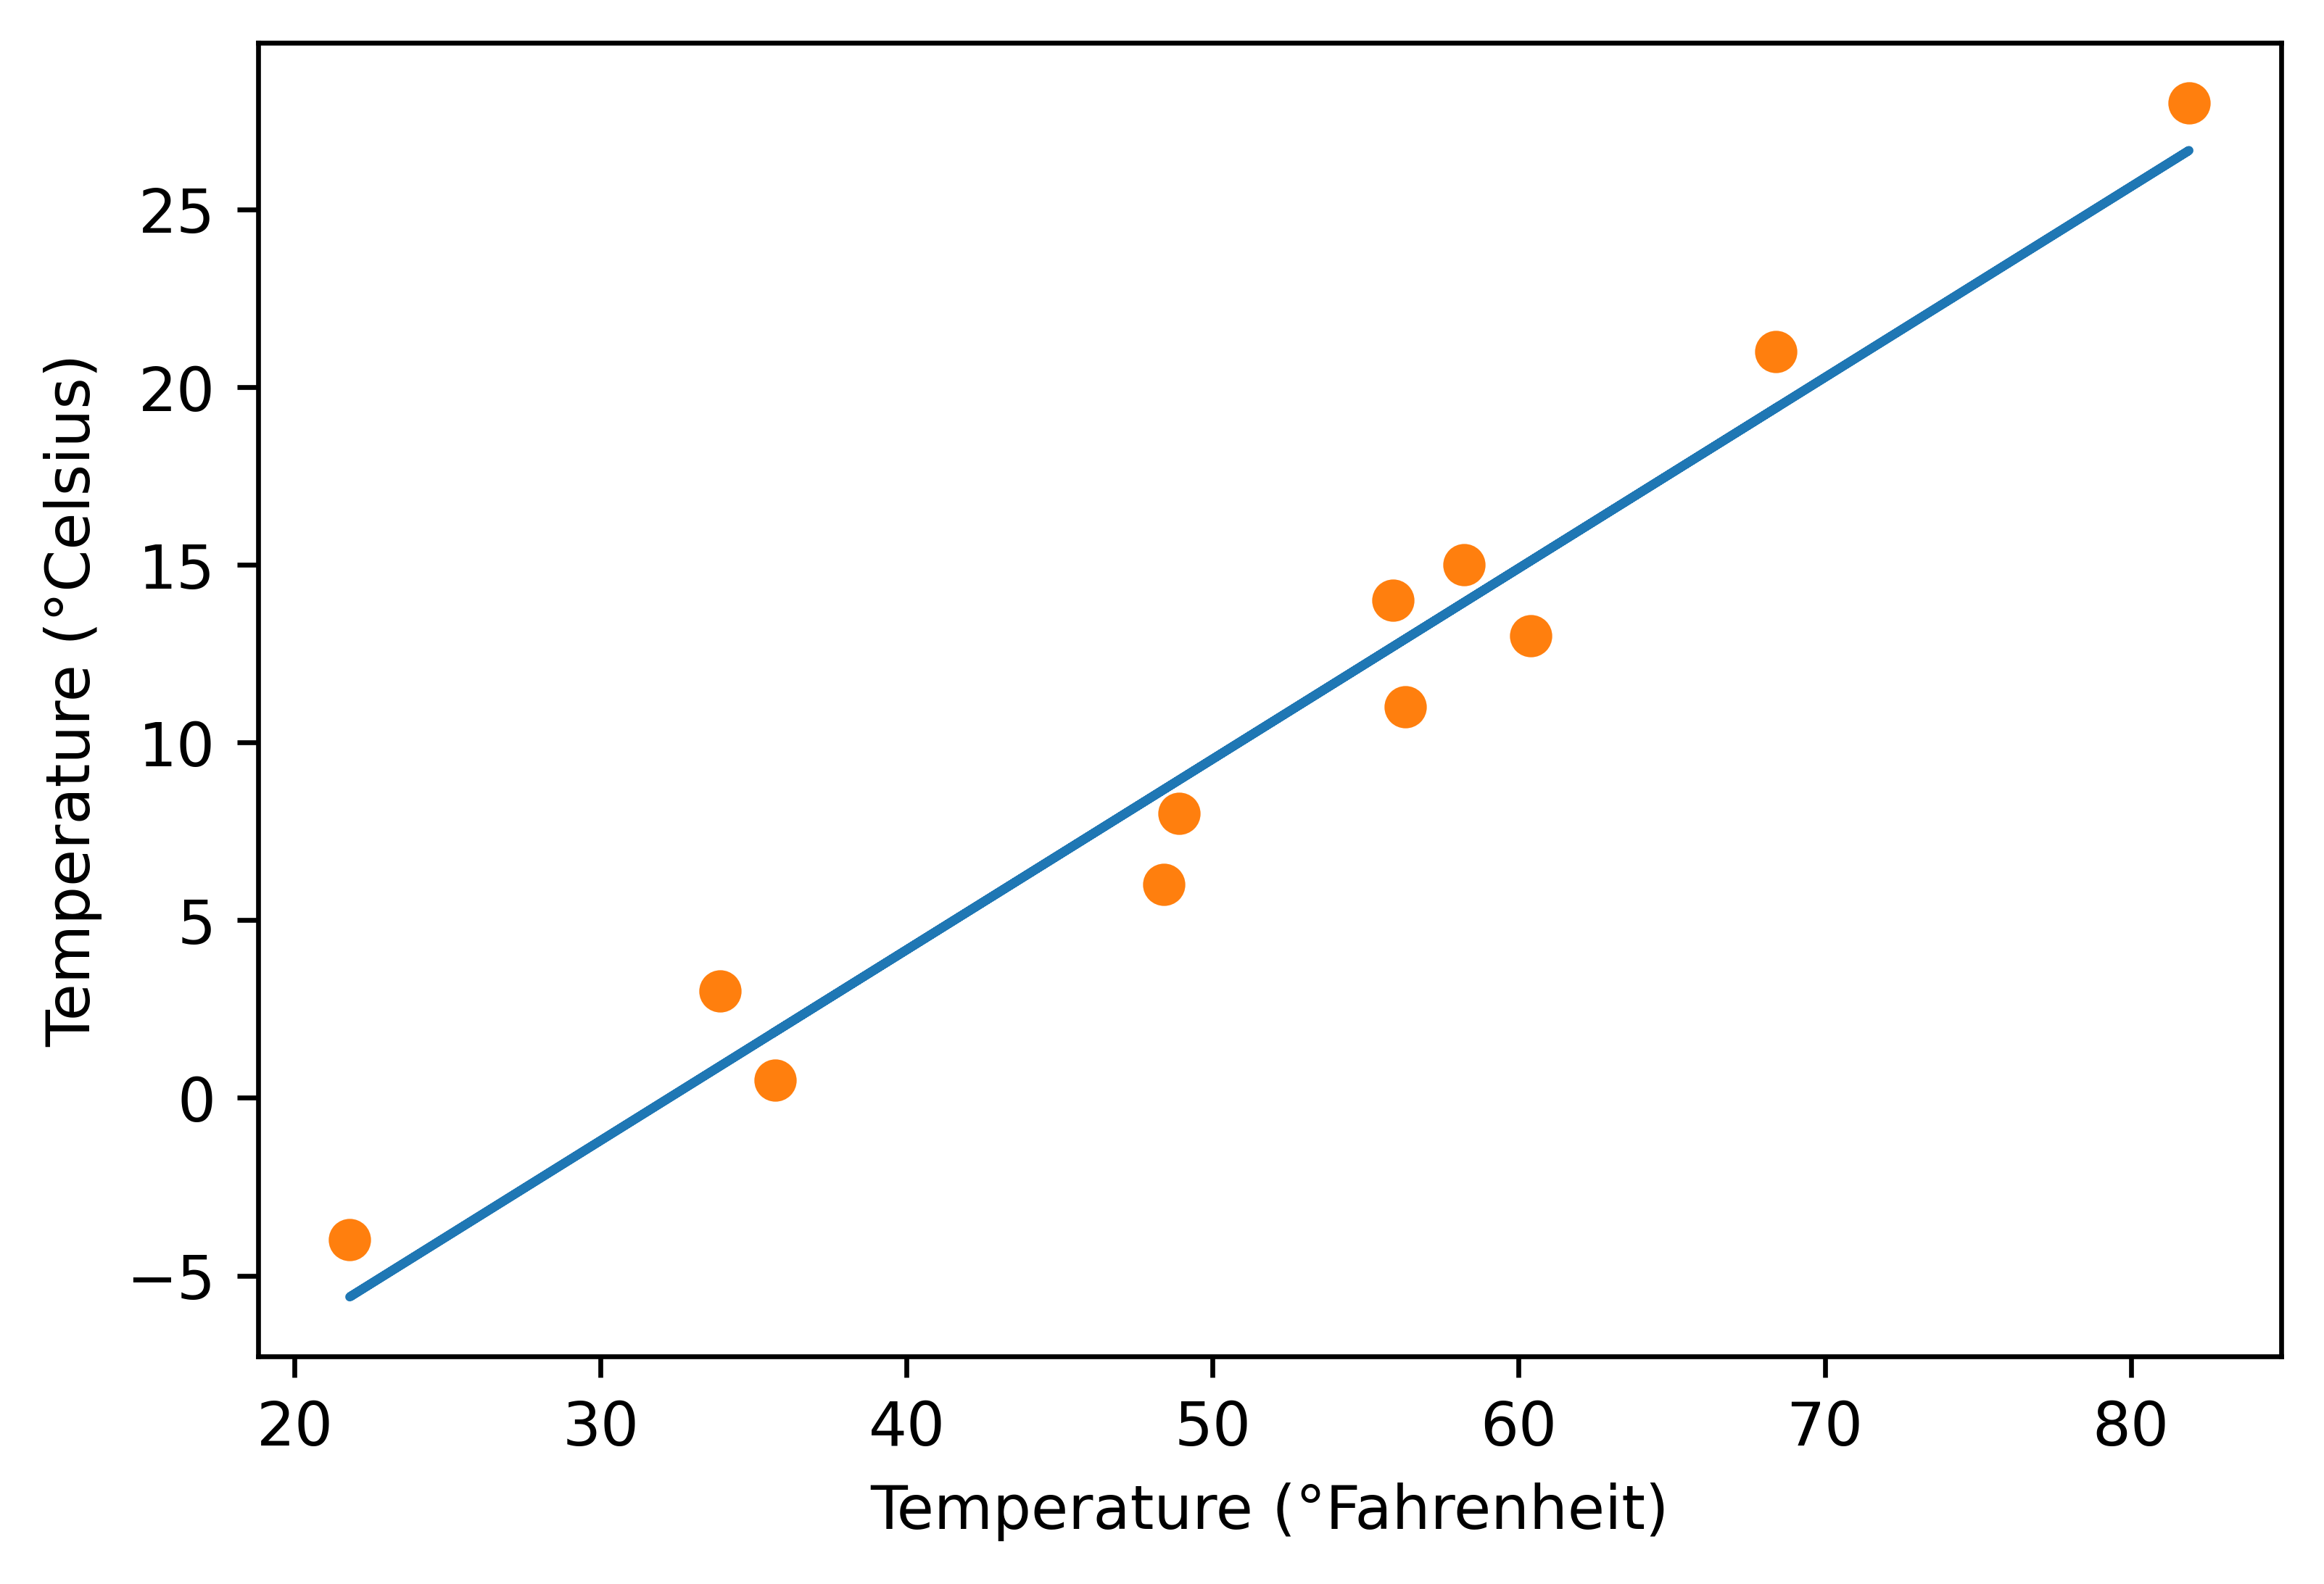

In [23]:
param = (5.367083549499512, -17.301189422607422)
preds = model(x_n, *param)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(x.numpy(), preds.detach().numpy())
plt.plot(x.numpy(), truth_celsius.numpy(), 'o')

### Computing the gradient automatically with PyTorch

### So PyTorch has something called __autograd__ apparently. A property of its tensors that gives them the ability to remember where they come from i.e. their parentage and origin of tensors. Therefore, any nested graph of tensors will automatically be differentiated with autograd, no matter how complex.

In [24]:
# we already have the loss function and the hypothesis function

model?

Signature: model(data, w, b)
Docstring: <no docstring>
File:      ~/pytorch_practice/Chapter_5/<ipython-input-7-a61dd8821a74>
Type:      function


In [25]:
loss?

Signature: loss(y, y_pred)
Docstring: <no docstring>
File:      ~/pytorch_practice/Chapter_5/<ipython-input-8-e2d7d2cae26a>
Type:      function


In [26]:
# initializing the parameters tensor

params = torch.tensor([1.0, 0.0], requires_grad=True)
# the requires_grad parameter tracks all the family tree folks that operate on params. Any tensor that has params as an 
# ancestor will have access to the sequence of functions it took from params to get to that tensor.

# If those tensor functions/operations are differentiable (as most are), they will be added to the grad attribute in params

params

tensor([1., 0.], requires_grad=True)

In [27]:
params.grad is None

True

In [28]:
l = loss(model(x, *params), truth_celsius)

l.backward() # this will compute the derivative of loss with respect to the elements in params

In [29]:
params.grad

tensor([4517.2969,   82.6000])

# __NOTE: Calling backward will lead derivatives to accumulate at leaf nodes. We need to zero the gradient explicitly after using it for parameter updates. So if backward was called earlier, the loss is evaluated again, backward is called again (as in any training loop), and the gradient at each leaf is accumulated (that is, summed) on top of the one computed at the previous iteration, which leads to an incorrect value for the gradient.__

In [30]:
# which is why after each iteration, the gradients must be zeroed

params.grad.zero_()
params.grad

tensor([0., 0.])

### Experimentation with autograd

In [31]:
d = torch.tensor([4], dtype=torch.float, requires_grad=True) # by the way, only floating point tensors can have requires_grad=True
f = d ** 2

f

tensor([16.], grad_fn=<PowBackward0>)

In [32]:
f.backward()

In [33]:
print(d.grad)

d.grad.zero_();

tensor([8.])


$$
\large\begin{equation}
f(d) = d^2 \\
f'(d) = 2 d
\end{equation}
$$

In [34]:
# let's try one composite function

d = torch.tensor([2], dtype=torch.float, requires_grad=True)

f = d ** 3
t = d ** 2

g = f * t

$$
\large\begin{equation}
f(d) = d^3 \\
t(d) = d^2 \\
g(d) = f(d) \cdot t(d) \\
\end{equation}
$$

When we differentiate $\large g(d)$ with respect to $\large d$, we get

$$
\large\begin{equation}
g'(d) = f'(d) \cdot t(d) + f(d) \cdot t'(d) \\
g'(d) = 3 d^2 \cdot d^2 + d^3 \cdot 2 d \\
g'(d) = 3 d^4 + 2 d^4 \\
g'(d) = 5 d^4
\end{equation}
$$

In [35]:
# to compute this derivative, we do

g.backward()

In [36]:
print(d.grad)

d.grad.zero_();

# 80 is correct because 5 * 2^4 = 80

tensor([80.])


In [37]:
def train_loop(epochs, lr, params, data, truth):
    for epoch in range(1, epochs+1):
        
        w, b = params
        
        curr_pred = model(data, w, b)
        
        curr_loss = loss(curr_pred, truth)
        
        curr_loss.backward() # computing the derivatives
        
        gradient = params.grad
        
        # THIS TELLS THE AUTOGRAD TO LOOK AWAY WHEN RUNNING THE CODE
        # THAT IS NOT ADD EDGES TO THE FORWARD GRAPH
        with torch.no_grad(): # THIS CODE IS REQUIRED WHEN DOING THE PARAMETER UPDATE
            params -= lr * gradient # this is an example of element wise multiplication and subtraction
            
        # WHEN TORCH.NO_GRAD() IS CALLED, THE FORWARD GRAPH IS CONSUMED, THE PARAMS LEAF NODE IS UPDATED
        # BEFORE MAKING A FRESH FORWARD GRAPH IN THE NEXT LOSS.BACKWARD() CALL
        
        if epochs > 1000:
            if epoch % 100 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")
        else:
            if epoch % 10 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")
            
        params.grad.zero_() # this needs to be called before the next time loss.backward() is called so that the gradients do not accumulate


In [38]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

train_loop(5000, 1e-2, params, x_n, truth_celsius)

Epoch 100:	loss = 22.0
grad: dw: -0.0 db: 3.0
params: w: 2.755274772644043 b: -2.5162105560302734

Epoch 200:	loss = 17.0
grad: dw: -0.0 db: 2.0
params: w: 3.1637372970581055 b: -4.8284430503845215

Epoch 300:	loss = 13.0
grad: dw: -0.0 db: 2.0
params: w: 3.508335590362549 b: -6.77915096282959

Epoch 400:	loss = 10.0
grad: dw: -0.0 db: 2.0
params: w: 3.799055337905884 b: -8.424863815307617

Epoch 500:	loss = 8.0
grad: dw: -0.0 db: 1.0
params: w: 4.044321060180664 b: -9.813268661499023

Epoch 600:	loss = 6.0
grad: dw: -0.0 db: 1.0
params: w: 4.251237869262695 b: -10.984587669372559

Epoch 700:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.425803184509277 b: -11.972770690917969

Epoch 800:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.573074817657471 b: -12.806446075439453

Epoch 900:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.697319507598877 b: -13.509775161743164

Epoch 1000:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.802137851715088 b: -14.103133201599121

Epoch 1100:	loss =

## Exploring PyTorch's available optimizers

In [39]:
import torch.optim as optim
# torch's optim submodule has classes that implement optimization algorithms

In [40]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [41]:
# example of vanilla gradient descent using the optim library

params = torch.tensor([1.0, 0.0], requires_grad=True)

opt = optim.SGD(params=[params], lr=1e-5)

opt

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [42]:
# SGD is ran over a subset of the input (a minibatch) in ideality, but unlike tensorflow, we can't just
# specify the batch_size in pytorch until now. Therefore, SGD will act like vanilla gradient descent instead of stochastic
# gradient descent when we feed it all the input.

In [43]:
# testing the new optimizer

preds = model(x, *params)

curr_loss = loss(preds, truth_celsius)

curr_loss.backward() # obtaining the derivative of the loss with respect to the parameters

opt.step() # this is one of the 2 main functions of optimizers. It takes a step down the loss function
# since the optimizer was given the params variable in its deifnition, it updated the values of params
# when the step() function was called
# What happens is that the optimizer looks into params.grad and updates
# params, subtracting learning_rate times grad from it,

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

# __WHEN WE PUT THE OPTIMIZER INTO THE LOOP, WE STILL NEED TO ZERO OUT THE GRADIENTS BEFORE THE BACKWARD() IS CALLED ON THE LOSS FUNCTION SO THAT THE GRADIENTS DO NOT ACCUMULUATE IN PARAMS.GRAD__

In [44]:
def train_loop(epochs, opt, params, data, truth):

    for epoch in range(1, epochs+1):

        curr_pred = model(data, *params)
        
        curr_loss = loss(curr_pred, truth)
        
        opt.zero_grad() # zeroing the gradients before computing the derivates again
        # THIS IS THE 2ND MOST IMPORTANT FUNCTION OF AN OPTIMIZER
        # IT TAKES CARE OF ZEROING THE GRADIENTS OF THE PARAMETERS WITH WHICH THE OPTIMIZER WAS DEFINED
        
        curr_loss.backward() # computing the derivatives
        
        opt.step() # stepping down the loss, updating the parameters
        
        gradient = params.grad

        if epochs > 1000:
            if epoch % 100 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")
        else:
            if epoch % 10 == 0:
                print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")


In [45]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
opt = torch.optim.SGD([params], lr=learning_rate)
    

train_loop(epochs=5000,
           opt=opt,
           params=params,
           data=x_n,
           truth=truth_celsius)

Epoch 100:	loss = 22.0
grad: dw: -0.0 db: 3.0
params: w: 2.755274772644043 b: -2.5162105560302734

Epoch 200:	loss = 17.0
grad: dw: -0.0 db: 2.0
params: w: 3.1637372970581055 b: -4.8284430503845215

Epoch 300:	loss = 13.0
grad: dw: -0.0 db: 2.0
params: w: 3.508335590362549 b: -6.77915096282959

Epoch 400:	loss = 10.0
grad: dw: -0.0 db: 2.0
params: w: 3.799055337905884 b: -8.424863815307617

Epoch 500:	loss = 8.0
grad: dw: -0.0 db: 1.0
params: w: 4.044321060180664 b: -9.813268661499023

Epoch 600:	loss = 6.0
grad: dw: -0.0 db: 1.0
params: w: 4.251237869262695 b: -10.984587669372559

Epoch 700:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.425803184509277 b: -11.972770690917969

Epoch 800:	loss = 5.0
grad: dw: -0.0 db: 1.0
params: w: 4.573074817657471 b: -12.806446075439453

Epoch 900:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.697319507598877 b: -13.509775161743164

Epoch 1000:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 4.802137851715088 b: -14.103133201599121

Epoch 1100:	loss =

### Adam is a better optimizer than SGD. It is impervious to different scales in the parameters, sets the learning rate adaptively, and does not need the input to be normalized (will work with different scales between the input and the output).

In [46]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
opt = torch.optim.Adam([params], lr=learning_rate)
    

train_loop(epochs=2000,
           opt=opt,
           params=params,
           data=x, # USING THE DATA THAT IS NOT NORMALIZED
           truth=truth_celsius)

Epoch 100:	loss = 24.0
grad: dw: -22.0 db: 2.0
params: w: 0.2608436942100525 b: -1.8626153469085693

Epoch 200:	loss = 19.0
grad: dw: -2.0 db: 2.0
params: w: 0.2975502908229828 b: -3.744218349456787

Epoch 300:	loss = 14.0
grad: dw: -2.0 db: 2.0
params: w: 0.33525633811950684 b: -5.882308483123779

Epoch 400:	loss = 11.0
grad: dw: -2.0 db: 2.0
params: w: 0.373011976480484 b: -8.022296905517578

Epoch 500:	loss = 8.0
grad: dw: -1.0 db: 1.0
params: w: 0.4080716371536255 b: -10.009542465209961

Epoch 600:	loss = 6.0
grad: dw: -1.0 db: 1.0
params: w: 0.43885567784309387 b: -11.75447940826416

Epoch 700:	loss = 4.0
grad: dw: -1.0 db: 1.0
params: w: 0.4646397531032562 b: -13.21601676940918

Epoch 800:	loss = 4.0
grad: dw: -0.0 db: 1.0
params: w: 0.48533251881599426 b: -14.388969421386719

Epoch 900:	loss = 3.0
grad: dw: -0.0 db: 0.0
params: w: 0.5012807846069336 b: -15.292988777160645

Epoch 1000:	loss = 3.0
grad: dw: -0.0 db: 0.0
params: w: 0.5130982398986816 b: -15.962857246398926

Epoch 1

### Shuffling the dataset into training and validation sets

In [89]:
m = x_n.size(0) # number of examples

val_split = int(0.2 * m)

perm = torch.randperm(m) # get shuffled indices for m elements


train_idx = perm[:-val_split] # take elements until val_split after which are val elements

validation_idx = perm[-val_split:]

train_idx, validation_idx

(tensor([7, 5, 2, 8, 4, 0, 6, 3, 1]), tensor([ 9, 10]))

In [90]:
train_x = x_n[train_idx] # normalizing with 0.1
train_y = truth_celsius[train_idx]

val_x = x_n[validation_idx] # normalizing
val_y = truth_celsius[validation_idx]

In [91]:
def train_loop(epochs, opt, params, data, truth, valx, valy):
    
    for epoch in range(1, epochs+1):
        
        curr_loss = loss(model(data, *params), truth)
        # ======================================
        # validation loss
        val_loss = loss(model(valx, *params), valy)
        
        opt.zero_grad() # zeroing the gradients before computing the derivatives
        curr_loss.backward() # getting the derivates
        opt.step() # updating the parameters with the gradients

        if epoch % 500 == 0 or epoch <=3:
            print(f"Epoch {epoch}:\ttraining loss = {curr_loss} \
                    validation loss: {val_loss}\n \
                    grad: dw: {params.grad[0]} db: {params.grad[1]})\n \
                    params: w: {params[0]} b: {params[1]}\n")
        

In [96]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)
# since we use SGD here we needed the normalized inputs before

train_loop(
    epochs = 3000,
    opt = optimizer,
    params = params,
    data = train_x,
    truth = train_y,
    valx = val_x,
    valy = val_y)

Epoch 1:	training loss = 70.56228637695312                     validation loss: 124.47359466552734
                     grad: dw: -63.99653625488281 db: -8.311111450195312)
                     params: w: 1.639965295791626 b: 0.08311111479997635

Epoch 2:	training loss = 40.37565612792969                     validation loss: 51.57497024536133
                     grad: dw: -29.019189834594727 db: -1.8732287883758545)
                     params: w: 1.93015718460083 b: 0.10184340178966522

Epoch 3:	training loss = 34.22074890136719                     validation loss: 30.382097244262695
                     grad: dw: -13.344480514526367 db: 1.0081175565719604)
                     params: w: 2.0636019706726074 b: 0.0917622298002243

Epoch 500:	training loss = 7.120349407196045                     validation loss: 6.405239582061768
                     grad: dw: -0.23494958877563477 db: 1.2752008438110352)
                     params: w: 4.133184909820557 b: -10.560690879821777

Epoch 10

### For larger neural networks, having to make a computation graph for the validation set is useless, becase we never use that loss to compute the derivatives. So we could (__and should__) forgo the autograd use for the validation loss as follows.

# __TORCH.NO_GRAD()__

In [ ]:
with torch.no_grad(): # THIS WAY PYTORCH SWITCHES AUTOGRAD OFF FOR ALL EXECUTIONS IN THIS SECTION
    val_preds = model(val_t_u, *params)
    val_loss = loss_fn(val_preds, val_truth)
    assert val_loss.requires_grad == False # Checks that our output requires_grad args are forced to False inside this block

### We could also set the grad to False when we just need to compute the forward pass without backpropagation, which would not require the gradient.

# __TORCH.SET_GRAD_ENABLED(TRUE / FALSE)__

In [ ]:
def calc_forward(data, truth, is_train):
    with torch.set_grad_enabled(is_train): # is_train is a boolean
    preds = model(data, *params)
    loss = loss_fn(preds, truth)
    return loss

## Exercise

1. Redefine the model to be $w_2 x^2 + w_1 x + b$.
  
  1. What parts of the training loop, and so on, need to change to accommodate
this redefinition?
        1. Since only the model / hypothesis function changes, the way the parameteres are initialized will need to be modified. Apart from that, since the backpropagation is automated with autograd, no other changes would be required. The loss function would remain the same since the hypothesis is still linear regression.
  2. What parts are agnostic to swapping out the model?
        1. Uhhh.
  3. Is the resulting loss higher or lower after training?
  4. Is the actual result better or worse?

In [ ]:
def model(data, w1, w2, b):
    return 